# Binary Classification

## Objective

1. Getting the Data
2. Setting up Environment
3. Create Model
4. Tune Model
5. Predict
6. Save/Load Model

### 1. Getting the Data

We will use a dataset from UCI called Default of Credit Card Clients Dataset. This dataset contains information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients in Taiwan from April 2005 to September 2005. There are 24,000 samples and 25 features.

In [1]:
from pycaret.datasets import get_data

dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
dataset.shape

(24000, 24)

Withheld a sample of 1200 records of predictions.

In [5]:
data = dataset.sample(frac=0.95, random_state=42)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Training: ', data.shape)
print('Data for Prediction: ', data_unseen.shape)

Data for Training:  (22800, 24)
Data for Prediction:  (1200, 24)


### 2. Setting up Environment

In [6]:
from pycaret.classification import *

In [7]:
exp = setup(data=data, target='default', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### 3. Creating Model

This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.8195,0.7630,0.3748,0.6660,0.4793,0.3803,0.4035,0.2287
1,Ridge Classifier,0.8194,0.0000,0.3564,0.6767,0.4665,0.3702,0.3980,0.0407
2,Gradient Boosting Classifier,0.8187,0.7798,0.3604,0.6697,0.4682,0.3707,0.3968,6.1740
3,CatBoost Classifier,0.8173,0.7808,0.3708,0.6561,0.4734,0.3731,0.3956,14.4155
4,Light Gradient Boosting Machine,0.8156,0.7748,0.3686,0.6496,0.4697,0.3682,0.3903,0.3443
5,Ada Boost Classifier,0.8141,0.7708,0.3276,0.6645,0.4386,0.3423,0.3732,1.5405
6,Extreme Gradient Boosting,0.8103,0.7557,0.3578,0.6277,0.4554,0.3508,0.3714,8.2182
7,Random Forest Classifier,0.8016,0.7278,0.3140,0.6015,0.4122,0.3068,0.3305,0.2254
8,Extra Trees Classifier,0.8007,0.7415,0.3587,0.5827,0.4434,0.3304,0.3451,1.3314
9,Quadratic Discriminant Analysis,0.7816,0.7339,0.2900,0.5583,0.3212,0.2264,0.2641,0.0816


In [9]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


List of classifiers available.

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


### LDA Classifier

In [11]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8164,0.7586,0.3909,0.6389,0.4851,0.3811,0.3982
1,0.8246,0.7911,0.3588,0.7056,0.4757,0.3835,0.4151
2,0.8271,0.7650,0.3983,0.6912,0.5054,0.4096,0.4325
3,0.8177,0.7660,0.3870,0.6493,0.4850,0.3827,0.4016
4,0.8170,0.7726,0.3870,0.6462,0.4841,0.3813,0.3998
5,0.8227,0.7650,0.3785,0.6802,0.4864,0.3896,0.4140
6,0.8120,0.7420,0.3531,0.6378,0.4545,0.3521,0.3746
7,0.8083,0.7430,0.3362,0.6263,0.4375,0.3344,0.3579
8,0.8283,0.7466,0.3701,0.7198,0.4888,0.3982,0.4300
9,0.8213,0.7799,0.3881,0.6650,0.4902,0.3908,0.4116


In [12]:
print(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


### 4. Tune Model

In [13]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7788,0.6457,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7782,0.6606,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7782,0.6515,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7782,0.6446,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7782,0.6317,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7782,0.6607,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7782,0.6142,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7782,0.6316,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7782,0.6471,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7787,0.6566,0.0000,0.0000,0.0000,0.0000,0.0000


Huh! Tuned model is worse than default.

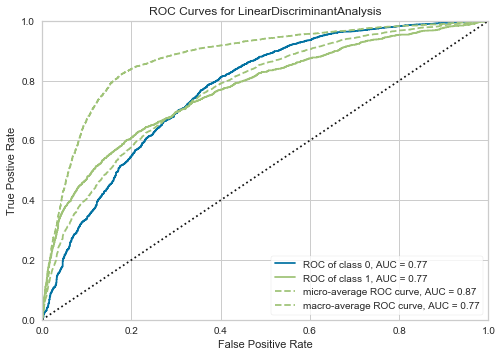

In [14]:
plot_model(lda, plot='auc')

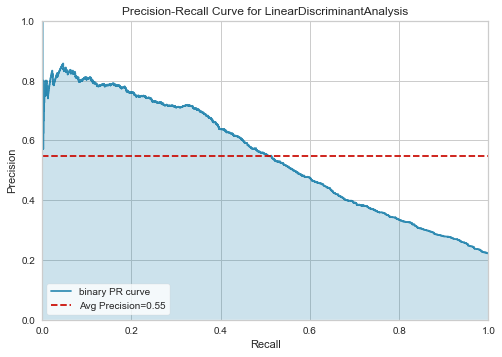

In [15]:
# precision recall curve
plot_model(lda, plot='pr')

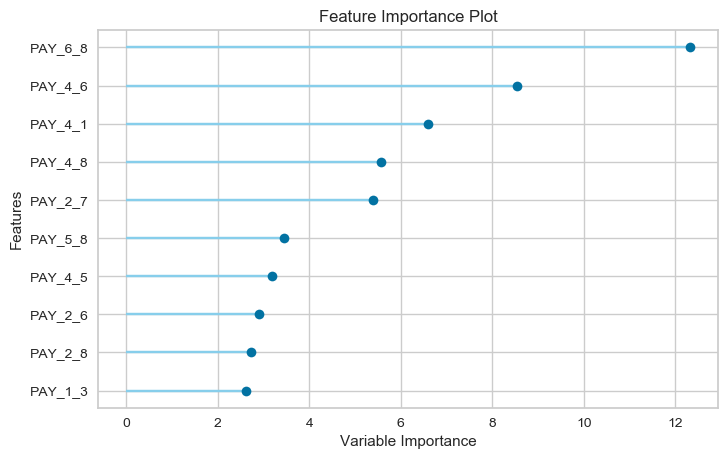

In [16]:
# feature importance curve
plot_model(lda, plot='feature')

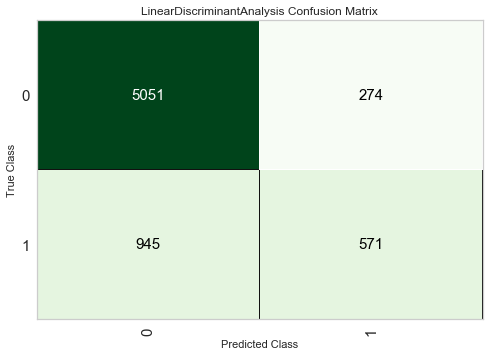

In [17]:
# confusion matrix
plot_model(lda, plot='confusion_matrix')

In [18]:
evaluate_model(lda)

,Parameters
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


### 5. Predict

In [19]:
predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8218,0.7696,0.3766,0.6757,0.4837,0.3864,0.4105


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,50000.0,45.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.1445
1,50000.0,42.0,29224.0,23807.0,17623.0,17974.0,18350.0,18721.0,2000.0,1293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1028
2,80000.0,36.0,77998.0,77452.0,74773.0,76908.0,77068.0,78434.0,3700.0,3500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0943
3,150000.0,48.0,3611.0,5153.0,6158.0,4626.0,0.0,0.0,2000.0,1523.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1341
4,220000.0,47.0,85224.0,69475.0,69651.0,68255.0,61183.0,60982.0,3209.0,2913.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,460000.0,44.0,15264.0,51372.0,103119.0,68541.0,28269.0,75942.0,51383.0,103142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0491
6837,50000.0,31.0,0.0,0.0,190.0,0.0,36059.0,32851.0,0.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2555
6838,70000.0,40.0,56922.0,60047.0,56884.0,57717.0,26342.0,26342.0,5500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.4100
6839,240000.0,41.0,3973.0,3724.0,7448.0,3724.0,5814.0,10942.0,3724.0,7448.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1023


In [20]:
# finalize model
final_lda = finalize_model(lda)

In [21]:
predict_model(final_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8228,0.7732,0.3766,0.6814,0.4851,0.3887,0.4136


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,50000.0,45.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.1477
1,50000.0,42.0,29224.0,23807.0,17623.0,17974.0,18350.0,18721.0,2000.0,1293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1006
2,80000.0,36.0,77998.0,77452.0,74773.0,76908.0,77068.0,78434.0,3700.0,3500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0922
3,150000.0,48.0,3611.0,5153.0,6158.0,4626.0,0.0,0.0,2000.0,1523.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1324
4,220000.0,47.0,85224.0,69475.0,69651.0,68255.0,61183.0,60982.0,3209.0,2913.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,460000.0,44.0,15264.0,51372.0,103119.0,68541.0,28269.0,75942.0,51383.0,103142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0499
6837,50000.0,31.0,0.0,0.0,190.0,0.0,36059.0,32851.0,0.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2507
6838,70000.0,40.0,56922.0,60047.0,56884.0,57717.0,26342.0,26342.0,5500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.3823
6839,240000.0,41.0,3973.0,3724.0,7448.0,3724.0,5814.0,10942.0,3724.0,7448.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0929


The test accuracy is just a little better than train accuracy, which is good!

In [22]:
# predict on unseen data
prediction = predict_model(final_lda, data=data_unseen)
prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,260000,2,1,2,51,-1,-1,-1,-1,-1,...,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,0,0.1044
1,80000,1,1,2,31,-1,-1,-1,-1,-1,...,390.0,0.0,390.0,390.0,390.0,390.0,390.0,0,0,0.1185
2,90000,1,2,2,35,0,0,0,0,0,...,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0,0,0.0970
3,80000,2,2,1,23,1,2,3,2,0,...,12034.0,1650.0,0.0,0.0,379.0,2091.0,1.0,0,1,0.5058
4,30000,1,1,2,41,2,2,2,2,2,...,28321.0,3500.0,0.0,2200.0,0.0,1200.0,1250.0,0,1,0.9218


The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

### 6. Saving/loading Model

In [25]:
save_model(final_lda, 'Final-LDA-Model')

Transformation Pipeline and Model Succesfully Saved


In [27]:
saved_final_lda = load_model('Final-LDA-Model')

Transformation Pipeline and Model Successfully Loaded


In [29]:
new_prediction = predict_model(saved_final_lda, data=data_unseen)

In [30]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,260000,2,1,2,51,-1,-1,-1,-1,-1,...,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,0,0.1044
1,80000,1,1,2,31,-1,-1,-1,-1,-1,...,390.0,0.0,390.0,390.0,390.0,390.0,390.0,0,0,0.1185
2,90000,1,2,2,35,0,0,0,0,0,...,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0,0,0.0970
3,80000,2,2,1,23,1,2,3,2,0,...,12034.0,1650.0,0.0,0.0,379.0,2091.0,1.0,0,1,0.5058
4,30000,1,1,2,41,2,2,2,2,2,...,28321.0,3500.0,0.0,2200.0,0.0,1200.0,1250.0,0,1,0.9218
